In [1]:
%run ../src/game.py
%run ../src/ipd.py
%run ../src/strategies.py
%run ../src/tools.py
dip =[(3,3),(0,5),(5,0),(1,1)]   # Dilemme du prisonnier



All is OK
All is OK


# Evaluation par synthèse de sous-classes

Les compétitions écologiques offrent un outil de mesure assez fiable de la robustesse d'une stratégies, mais encore insuffisant. Il se peut par exemple que certaines stratégies se sacrifient pour d'autres dans un schema *maitre-esclave*. Avoir une synthèse de centaines voir de milliers de compétitions écologiques dans lesquelles on a enlevé certaines stratégies mesure sans doute une meilleure robustesse. L'une des idées les plus simples consiste à calculer les n compétitions possibles que l'on peut faire en enlevant 1 stratégie à un ensemble de n stratégies. On appelle cette technique la technique des sous-classes.
Nous définissions ici 3 fonctions permettant de réaliser ces sous-classes.
- `subclasses(bag, n)` qui évalue tous les sous ensembles possibles de taille n dans la bage
- `subclassesWithOneStrat(bag, n, strat)` qui évalue Strat dans tous les sous ensembles possibles de taille n dans la bage en ajoutant systématiquement la stratégie strat
- `subclassesRandomWithOneStrat(p, bag, n, Strat)` qui réalise p competitions de n strategies choisies au hasard dans la bage dans lesquelles on rajoute systématiquement Strat

Les évaluations réalisées dans ces fonctions sont des compétitions écologiques.

Ces fonctions renvoient à la fin un tableau avec pour chaque stratégie, sa meilleure place, sa pire place, sa moyenne et son écart-type.

#### Un cas simple : toutes les compétitions de 3 stratégies parmi les classiques

In [12]:
All_C = Periodic('C')
All_D = Periodic('D')
bag = [All_C, All_D, Tft(), Spiteful(), Gradual(), SoftMajority(), HardMajority()]
subClasses(bag, 3)

          BestRank  WorstRank   RankAvg   RankStd
tft            1.0        2.0  1.133333  0.351866
softmajo       1.0        2.0  1.133333  0.351866
spiteful       1.0        2.0  1.266667  0.457738
gradual        1.0        2.0  1.333333  0.487950
per_C          1.0        3.0  1.400000  0.632456
per_D          1.0        3.0  2.533333  0.743223
hardmajo       2.0        3.0  2.666667  0.487950


#### Un cas plus volumineux : toutes les stratégies Mem(1,1) avec une stratégie en moins à chaque fois
Sachant qu'il y a 32 `mem(1,1)` cette opération réalise donc 32 compétitions de 31 stratégie. Notez que dans le cas de cette méthode, toutes les stratégies sont présentes (et absentes) exactement le même nombre de fois.


In [19]:
import time
before = time.time()
bag = getAllMemory(1,1)
subClasses(bag, len(bag)-1)
after = time.time()
print("Time : {}".format(after-before))

       BestRank  WorstRank   RankAvg   RankStd
CCDDD       1.0        1.0  1.000000  0.000000
CCDCD       1.0        2.0  1.967742  0.179605
CCDDC       2.0        3.0  2.935484  0.249731
CCDCC       2.0        4.0  3.838710  0.454369
CCCCC       2.0        5.0  4.806452  0.601074
CCCCD       2.0        5.0  4.806452  0.601074
CCCDC       2.0        5.0  4.806452  0.601074
CCCDD       2.0        5.0  4.806452  0.601074
CDCCC       2.0        5.0  4.806452  0.601074
CDCCD       2.0        5.0  4.806452  0.601074
CDCDC       2.0        5.0  4.806452  0.601074
CDCDD       2.0        5.0  4.806452  0.601074
CDDCC       2.0        5.0  4.806452  0.601074
CDDCD       2.0        5.0  4.806452  0.601074
CDDDC       2.0        5.0  4.806452  0.601074
CDDDD       2.0        5.0  4.806452  0.601074
DCCCC       2.0        5.0  4.806452  0.601074
DCCCD       2.0        5.0  4.806452  0.601074
DCCDC       2.0        5.0  4.806452  0.601074
DCCDD       2.0        5.0  4.806452  0.601074
DCDCC       2

#### Test de la stratégie Spiteful avec tous les triplets de classiques
Dans les cas des deux méthodes `subClassesWithOneStrat` seule la stratégie passée en paramètre participe à toutes les sous-classes (faisable pour des ensembles pas trop volumineux genre `mem(1,1)`). Dans la première elle participe à la totalité des sous-classes tandis qu'avec `subClassesRandomWithOneStrat` elle participe à un nombre fixé de sous classes de même taille mais prises aléatoirement (utilisable dans de gros ensembles comme `mem(2,2)`).

In [ ]:
All_C = Periodic('C')
All_D = Periodic('D')
bag = [All_C, All_D, Tft(), Gradual(), SoftMajority(), HardMajority()]
res  = subClassesWithOneStrat(bag, 3, Spiteful())
#Pour afficher le tableau en entier : 
#res = subClassesWithOneStrat(bag, 3, Spiteful(), True)

Il est à noter que les objets `subClassesWithOneStrat` et `subClassesRandomWithOneStrat` conservent le 
meilleur et le pire des tournois pour la stratégie `strat`
Au moment de l'affichage du classement des sous-classes il est de ce fait possible d'afficher l'ensemble de stratégies qui a été favorable ou défavorable à la stratégie `Strat`.

In [ ]:
meilleureComp, pireComp, strategy = res
print("La meilleure competition pour la stratégie "+strategy.name +" est : ")
for strat in meilleureComp :
    print(strat.name)

#### 100 experiences de 10 stratégies prise au hasard dans mem(2,2) contre Gradual()
Pour les `subclassesRandom`, si une stratégie n'a joué qu'une seule fois alors elle n'a pas d'écart-type (`NaN`); si elle n'a pas joué du tout alors toutes ses valeurs sont à `NaN` dans le tableau

In [ ]:
bag = getAllMemory(2,2)
res = subClassesRandomWithOneStrat(100,bag, 10, Gradual())
#Pour afficher le tableau en entier : 
#subClassesRandomWithOneStrat(100, bag, 10, Gradual(), True)

# Attention : cette expérience prend de l'ordre de 1mn

On peut d'ailleurs vérifier la compétition la plus "défavorable" à Gradual 
(comme c'est un choix aléatoire, donc 2 éxécutions ne donneront pas systématiquement le même résultat)

In [ ]:
bestComp, worstComp, strategy = res

In [ ]:
bag = worstComp
e2=Ecological(g,bag)
e2.run()
e2.drawPlot(None,None)
evol=e2.historic
print(evol.iloc[-1])
print(e2.historic.iloc[e2.generation].rank(0, method="min", ascending=False))

## Tests de robustesse de MetaStratégie

In [13]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 5)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat)

Strategy ranking  : metastrat
BestRank     2.000000
WorstRank    6.000000
RankAvg      5.757576
RankStd      0.751262
Name: metastrat, dtype: float64


In [84]:
metaStrat = MetaStrategy([Tft(), Spiteful(), Prober(), Gradual()], 5)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat)

Strategy ranking  : metastrat
BestRank     2.000000
WorstRank    3.000000
RankAvg      2.939394
RankStd      0.242306
Name: metastrat, dtype: float64


In [87]:
metaStrat = MetaStrategy([Tft(), Spiteful(), Gradual()], 5)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat)

Strategy ranking  : metastrat
BestRank     2.000000
WorstRank    3.000000
RankAvg      2.939394
RankStd      0.242306
Name: metastrat, dtype: float64


## Tests d'équivalence de stratégies

`equivalence` est une fonction permettant d'évaluer si une liste de stratégies ont le même comportement face à une soupe de stratégies (en Tournoi). Elle renvoie la liste simplifiée et True si des stratégies sont équivalentes et False sinon.

In [15]:
def equivalence(l, soup, length):
    res = []
    for strat in l :
        t = Tournament(g, soup+[strat], length)
        t.run()
        s = t.matrix[strat.name].to_string()
        res += [tuple([int(i) for i in s.split() if i.isdigit()])] 
    return res, len(set(res)) < len(l)
        
        
equivalence([Periodic("C"), Periodic("C")], [Periodic("D"), Tft()], 10)
equivalence([Periodic("CCCD"), Periodic("CCDCD")], [Periodic("D")],2)

([(10, 6), (10, 6)], True)

`simplify` est une fonction permettant de simplifier la soupe passée paramètres en verifiant l'équivalence des stratégies face à `opponents` pendant un Tournoi de `length` tours.
Elle renvoie la soupe en entier si il n'y a pas de simplification possible et la liste simplifiée sinon.

In [16]:
def simplify(soup, opponents , length):
    res, b = equivalence(soup, opponents, length)
    if b : 
        s = set(res)
        s = list(s)
        ind = []
        for i in range(len(s)) :
            ind += [res.index(s[i])]
            
        simplified = []
        for i in range(len(ind)):
            simplified += [soup[ind[i]]]
        
        print("{} strategies deleted. ".format(len(res)-len(simplified)))
        return simplified
    else : 
        return soup
    
simplify([Periodic("CCCD"), Periodic("CCDCD"), Periodic('D')], getMem(1,1), 2)

        

1 strategies deleted. 


[<__main__.Periodic at 0x7f432ba9f400>, <__main__.Periodic at 0x7f432ba9f358>]

In [18]:
res11 = simplify(getMem(1,1), [Periodic('C'), Periodic('D')], 100)
res12 = simplify(getMem(1,2), [Periodic('C'), Periodic('D')], 100)
res21 = simplify(getMem(2,1), [Periodic('C'), Periodic('D')], 100)
#res22 = simplify(getMem(2,2), [Periodic('C'), Periodic('D')], 100)

tab = pd.DataFrame(
        np.nan, ["Mem 1 1", "Mem 1 2", "Mem 2 1", "Mem 2 2"], ["All strategies", "After simplify"]
    )
tab.at["Mem 1 1", "All strategies" ] = 32
tab.at["Mem 1 2", "All strategies" ] = 1024
tab.at["Mem 2 1", "All strategies" ] = 1024
tab.at["Mem 2 2", "All strategies" ] = 2048
tab.at["Mem 1 1", "After simplify" ] = len(res11)
tab.at["Mem 1 2", "After simplify" ] = len(res12)
tab.at["Mem 2 1", "After simplify" ] = len(res21)
#tab.at["Mem 2 2", "After simplify" ] = res22

tab


11 strategies deleted. 
917 strategies deleted. 
835 strategies deleted. 


,All strategies,After simplify
Mem 1 1,32.0,21.0
Mem 1 2,1024.0,107.0
Mem 2 1,1024.0,189.0
Mem 2 2,2048.0,NaN


## Dilemme spatial (en cours)

<IPython.core.display.Javascript object>


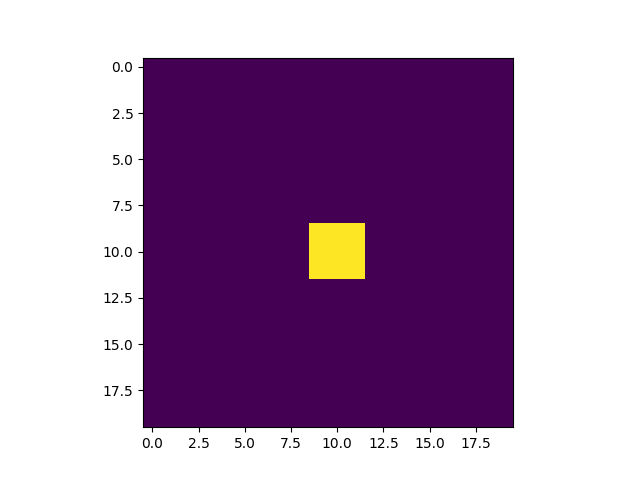

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random

# Input variables for the board
boardsize = 20   # board will be X by X where X = boardsize
my_board = np.empty((boardsize, boardsize), dtype=float)


# Some helper functions
def init_strategies():
    strategies = np.zeros((boardsize, boardsize), dtype=object)
    for i in range(boardsize) :
        for j in range(boardsize):
            strategies[i, j] = "C"
    strategies[10, 10] = "D"
    return strategies
    
# Initialize the board with starting positions
def strategies_to_board(strategies):
    for i in range(boardsize) :
        for j in range(boardsize) :
            if strategies[i, j] == "C":
                my_board[i , j] = 0
            else : 
                my_board[i, j] = 1
    #print("-------------------------")
    #print(strategies)
    #print(my_board)
    #print("--------------------------------")"
    return my_board
    

# https://github.com/evoplex/model-prisonersDilemma
def update_strategies():
    scores = play()
    strategies = np.copy(update(scores))
    #print(strategies)
    return strategies

def play():
    scores = np.zeros((boardsize, boardsize))
    for i in range(boardsize):
        for j in range(boardsize):
            score = 0
            #cpt = 0
            score += getScore(strategies, i, j, i, j)
            if i >= 0 and j >= 0:
                score += getScore(strategies, i, j, i-1, j-1)
                #cpt += 1
            if j >= 0:
                score += getScore(strategies, i, j, i, j-1)
                #cpt += 1
            if i >= 0 :
                score += getScore(strategies, i, j, i-1, j)
                #cpt += 1
            if i < boardsize - 1 and j < boardsize - 1 :
                score += getScore(strategies, i, j, i+1, j+1)
                #cpt += 1
            if i < boardsize - 1 :
                score += getScore(strategies, i, j, i+1, j)
                #cpt += 1
            if j < boardsize -1 :
                score += getScore(strategies, i, j, i, j+1)
                #cpt += 1
            if i < boardsize - 1 and j >= 0:
                score += getScore(strategies, i, j, i+1, j-1)
                #cpt += 1
            if i >= 0 and j < boardsize - 1 :
                score += getScore(strategies, i, j, i-1, j+1)
                #cpt += 1
            scores[i][j] = score
    #print(scores)
    return scores

def update(scores):
    print(scores)
    new_strategies = np.zeros((boardsize, boardsize), dtype=object)
    for i in range(boardsize):
        for j in range(boardsize):
            best = scores[i][j]
            ind_i = i 
            ind_j = j
            if i >= 0 and j >= 0:
                if scores[i-1][j-1] > best :
                    best = scores[i-1][j-1]
                    ind_i = i - 1
                    ind_j = j - 1
            if j >= 0:
                if scores[i][j-1] > best :
                    best = scores[i][j-1]
                    ind_i = i 
                    ind_j = j - 1
            if i >= 0 :
                if scores[i-1][j] > best :
                    best = scores[i-1][j]
                    ind_i = i - 1
                    ind_j = j 
            if i < boardsize - 1  and j < boardsize - 1 :
                if scores[i+1][j+1] > best :
                    best = scores[i+1][j+1]
                    ind_i = i + 1
                    ind_j = j + 1
            if i < boardsize - 1:
                if scores[i+1][j] > best :
                    best = scores[i+1][j]
                    ind_i = i + 1
                    ind_j = j 
            if j < boardsize - 1:
                if scores[i][j+1] > best :
                    best = scores[i][j+1]
                    ind_i = i 
                    ind_j = j + 1
            if i < boardsize - 1 and j >= 0:
                if scores[i+1][j-1] > best :
                    best = scores[i+1][j-1]
                    ind_i = i + 1
                    ind_j = j - 1
            if i >= 0 and j < boardsize - 1:
                if scores[i-1][j+1] > best :
                    best = scores[i-1][j+1]
                    ind_i = i - 1
                    ind_j = j + 1

                    
            new_strategies[i][j] = strategies[ind_i][ind_j]
    return new_strategies
            

def getScore(strategies, i, j, k, l):
    s1 = strategies[i][j]
    s2 = strategies[k][l]
    if s1 == 'C' and s2 == 'C':
        return 1
    if s1 == 'C' and s2 == 'D':
        return 0
    if s1 == 'D' and s2 == 'C':
        return 1.9
    else : 
        return 0

def update_board(my_board):
    strategies = np.copy(update_strategies())
    print(strategies)
    my_board = np.copy(strategies_to_board(strategies))
    print(my_board)
    return my_board




# Initialize the board
strategies = init_strategies()
my_board = strategies_to_board(strategies)

##### Animate the board #####
# This will throw an error the first time you run the code, but the program will run properly if you
# execute the cell again (there is an error with the animation package that I cannot seem to get rid of)

# Required line for plotting the animation
%matplotlib notebook
# Initialize the plot of the board that will be used for animation
fig = plt.gcf()
# Show first image - which is the initial board
im = plt.imshow(my_board)
plt.show()


# Helper function that updates the board and returns a new image of
# the updated board animate is the function that FuncAnimation calls
def animate(frame):
    im.set_data(update_board(my_board))
    return im,

# This line creates the animation
anim = animation.FuncAnimation(fig, animate, interval=50)

In [11]:
strategies = init_strategies()
my_board = strategies_to_board(strategies)
update_board(my_board)
update_board(my_board)
update_board(my_board)

[[ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   6. ]
 [ 9.   9.   9.   9.   9.   9.   9.   9.   9.   8.   8.   8.   9

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.